In [3]:
!pip install pandas openpyxl numpy



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

In [5]:
df= pd.read_excel("Urban_Grocers.csv.xlsx")
display(df.head())

,Date,Store_ID,Transaction_ID,Food_Category,Units_Sold,Price_per_Unit,Promotion,Holiday_Weekend,Weather,Mode_Purchase
0,2023-01-01,C,5W9bBXa2QE,Vegetables,3,71.92,0,1,Rainy,Cash
1,2023-01-02,C,CYVvGzEfX6,Fruits,47,44.60,0,0,Cloudy,Credit Card
2,2023-01-03,C,HfhZ99ML1Y,Bread,4,65.61,1,0,Sunny,Cash
3,2023-01-04,B,1VcGmwPXOx,Milk,21,79.29,0,0,Cloudy,Debit Card
4,2023-01-05,C,I4SUTh6RGM,Milk,1,54.44,0,0,Rainy,Cash


In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract only month name (short form like Jan, Feb, ...)
df['Month'] = df['Date'].dt.strftime('%b')

# If you want full month name:
# df['Month'] = df['Date'].dt.strftime('%B')

display(df[['Date', 'Month']].head(10))


,Date,Month
0,2023-01-01,Jan
1,2023-01-02,Jan
2,2023-01-03,Jan
3,2023-01-04,Jan
4,2023-01-05,Jan
5,2023-01-06,Jan
6,2023-01-07,Jan
7,2023-01-08,Jan
8,2023-01-09,Jan
9,2023-01-10,Jan


In [7]:
df.to_csv("processedData.csv")

In [8]:
store_std = df.groupby('Store_ID')['Units_Sold'].std().reset_index()

# Rename column for clarity
store_std.columns = ['Store_ID', 'Units_Sold_STD']

# Display the result
print(store_std)

  Store_ID  Units_Sold_STD
0        A       14.420359
1        B       14.436069
2        C       14.377955
3        D       14.413363


In [13]:
store_stats = df.groupby('Store_ID')['Units_Sold'].agg(['mean', 'std']).reset_index()

# Add CV column
store_stats['CV_percent'] = (store_stats['std'] / store_stats['mean']) * 100

# Rename columns for clarity
store_stats.columns = ['Store_ID', 'Units_Sold_Mean', 'Units_Sold_STD', 'CV_percent']

display(store_stats)

,Store_ID,Units_Sold_Mean,Units_Sold_STD,CV_percent
0,A,25.516450,14.420359,56.513969
1,B,25.563543,14.436069,56.471315
2,C,25.547252,14.377955,56.279850
3,D,25.605535,14.413363,56.290029


In [10]:
store_stats.to_csv("demand_deviation.csv")

In [33]:
df['Transaction_Revenue'] = df['Units_Sold'] * df['Price_per_Unit']

# Calculate the total revenue from all transactions
# We sum up the 'Transaction_Revenue' column
total_revenue = df['Transaction_Revenue'].sum()

# Calculate the total profit using the 14% margin
# The margin profit is given as 14%, so we multiply the total revenue by 0.14
margin_profit_percentage = 0.14
total_profit = total_revenue * margin_profit_percentage

# The initial investment was Rupees 20 crores ($200,000,000)
initial_investment = 200000000

# Perform the investment analysis
if total_profit >= initial_investment:
    print(f"Investment Status: Successful. The company has recovered its investment and is profitable with a surplus of ${total_profit - initial_investment:,.2f}.")
else:
    print(f"Investment Status: Unsuccessful. The company has a shortfall of Rs.{initial_investment - total_profit:,.2f} from recovering its initial investment.")

print(f"Total Revenue: Rs.{total_revenue:,.2f}")
print(f"Total Profit: Rs.{total_profit:,.2f}")

Investment Status: Unsuccessful. The company has a shortfall of Rs.157,022,690.10 from recovering its initial investment.
Total Revenue: Rs.306,980,784.99
Total Profit: Rs.42,977,309.90


In [12]:
display(df[df["Month"]=="Dec"])

,Date,Store_ID,Transaction_ID,Food_Category,Units_Sold,Price_per_Unit,Promotion,Holiday_Weekend,Weather,Mode_Purchase,Month,Transaction_Revenue
334,2023-12-01,A,cJpXCGEruE,Meat,42,42.71,1,0,Cloudy,UPI,Dec,1793.82
335,2023-12-02,A,d6ZqXO9DGd,Milk,48,42.74,0,1,Sunny,Credit Card,Dec,2051.52
336,2023-12-03,D,bQh1nt4HRJ,Fruits,32,78.19,0,1,Rainy,Credit Card,Dec,2502.08
337,2023-12-04,C,NGI2DPZ0Fg,Fruits,3,20.63,1,0,Cloudy,UPI,Dec,61.89
338,2023-12-05,A,vcMEFJuV8w,Meat,6,75.56,0,0,Sunny,Credit Card,Dec,453.36
...,...,...,...,...,...,...,...,...,...,...,...,...
239755,2024-12-16,B,GS60yvYnx7,Meat,45,61.46,0,0,Sunny,UPI,Dec,2765.70
239756,2024-12-17,A,CZSK2pc6mP,Milk,26,45.44,0,0,Sunny,UPI,Dec,1181.44
239757,2024-12-18,D,Hpl8ATgmEc,Vegetables,44,50.58,0,0,Rainy,Cash,Dec,2225.52
239758,2024-12-19,A,lsDgWeZlKo,Bread,45,41.63,0,0,Cloudy,Cash,Dec,1873.35


In [15]:
# Calculate average sales for promoted and non-promoted periods
avg_promoted_sales = df[df['Promotion'] == 1]['Units_Sold'].mean()
avg_non_promoted_sales = df[df['Promotion'] == 0]['Units_Sold'].mean()

# Calculate the overall percentage change
if avg_non_promoted_sales != 0:
    overall_impact = ((avg_promoted_sales - avg_non_promoted_sales) / avg_non_promoted_sales) * 100
    print(f"\nOverall Promotion Impact:")
    print(f"Average Units Sold (Non-Promoted): {avg_non_promoted_sales:.2f}")
    print(f"Average Units Sold (Promoted): {avg_promoted_sales:.2f}")
    print(f"Percentage Change: {overall_impact:.2f}%")
else:
    print("\nCannot calculate overall impact as non-promoted sales are zero.")

# Repeat the analysis for each Food_Category
print("\nPromotion Impact by Food Category:")

# Group the data by Food_Category and Promotion status
category_promotion_sales = df.groupby(['Food_Category', 'Promotion'])['Units_Sold'].mean().unstack()

# Calculate the percentage change for each category
category_promotion_sales['Percentage_Change'] = (
    (category_promotion_sales[1] - category_promotion_sales[0]) / category_promotion_sales[0]
) * 100

display(category_promotion_sales)


Overall Promotion Impact:
Average Units Sold (Non-Promoted): 25.56
Average Units Sold (Promoted): 25.57
Percentage Change: 0.04%

Promotion Impact by Food Category:


Promotion,0,1,Percentage_Change
Food_Category,,,
Bread,25.542203,25.532403,-0.038369
Fruits,25.506163,25.497388,-0.034403
Meat,25.690834,25.572652,-0.460018
Milk,25.599214,25.696000,0.378080
Vegetables,25.445010,25.538887,0.368943


In [18]:
!pip install matplotlib prophet

     ---------------------------------------- 0.0/49.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/49.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/49.1 kB ? eta -:--:--
     ----------------------- -------------- 30.7/49.1 kB 187.9 kB/s eta 0:00:01
     ------------------------------- ------ 41.0/49.1 kB 281.8 kB/s eta 0:00:01
     ------------------------------- ------ 41.0/49.1 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 49.1/49.1 kB 166.2 kB/s eta 0:00:00
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 3.0 MB/s eta 0:00:05
    --------------------------------------- 0.2/13.3 MB 2.1 MB/s eta 0:00:07
    --------------------------------------- 0.2/13.3 MB 1.4 MB/s eta 0:00:10
    --------------------------------------- 0.3/13.3 MB 1.5 MB/s eta 0:00:09
   - ------------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


22:38:30 - cmdstanpy - INFO - Chain [1] start processing
22:38:30 - cmdstanpy - INFO - Chain [1] done processing
d:\workspace\Analatica-Case-Study\pack\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


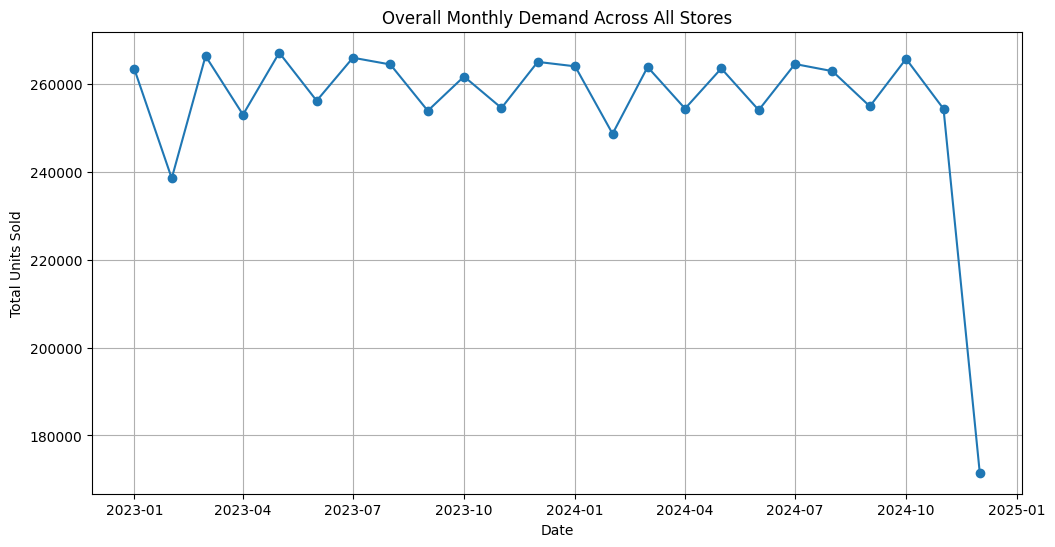

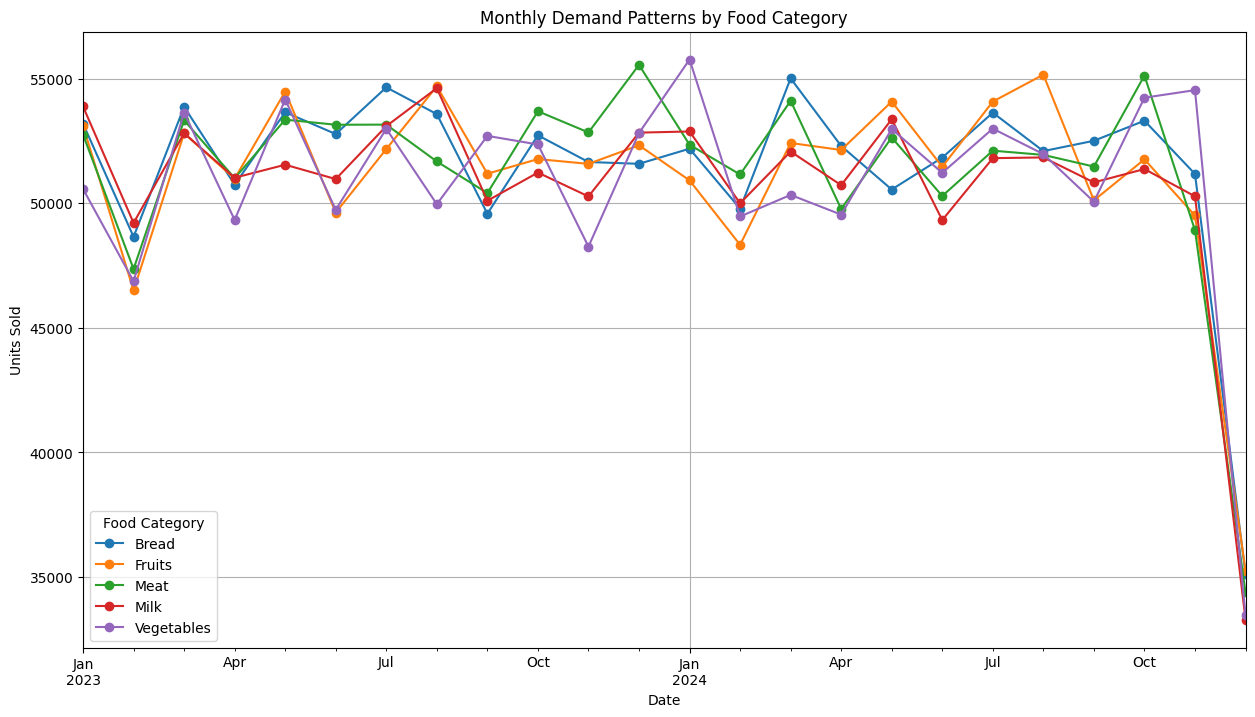

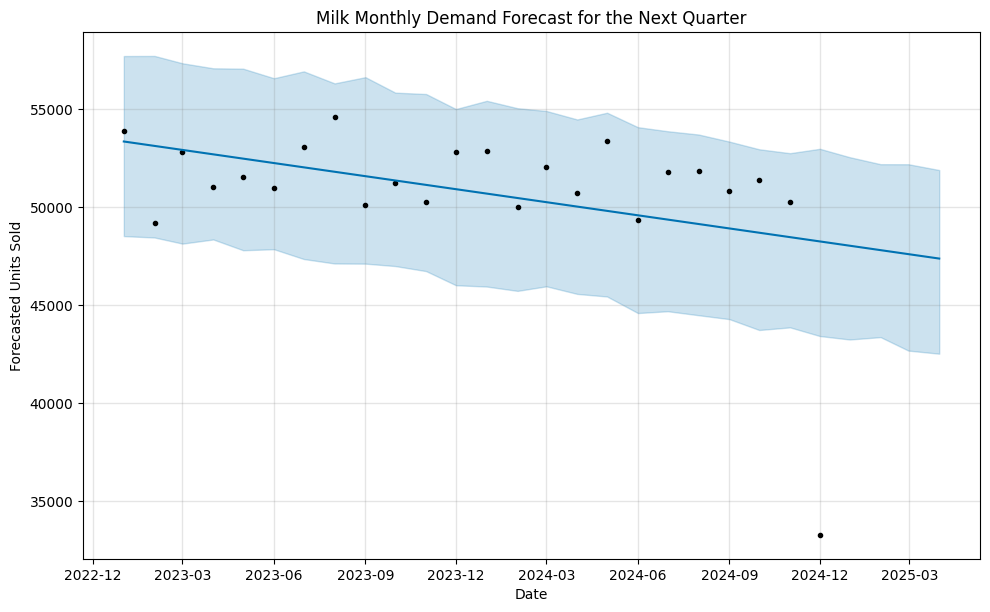


### Analysis of Demand Patterns and Forecast ###

**1. Overall Monthly Demand:**
Total units sold per month:


,Month,Units_Sold
0,2023-01-01,263490
1,2023-02-01,238573
2,2023-03-01,266427
3,2023-04-01,253063
4,2023-05-01,267175
5,2023-06-01,256233
6,2023-07-01,266036
7,2023-08-01,264499
8,2023-09-01,253951
9,2023-10-01,261755



**2. Category-Specific Promotion Impact:**
Average units sold per category with and without promotions:


,Non-Promoted_Units,Promoted_Units,Percentage_Change
Food_Category,,,
Bread,25.542203,25.532403,-0.038369
Fruits,25.506163,25.497388,-0.034403
Meat,25.690834,25.572652,-0.460018
Milk,25.599214,25.696000,0.378080
Vegetables,25.445010,25.538887,0.368943



**3. Milk Demand Forecast for the Next Quarter:**


,index,Month,Forecasted_Units,Lower_Bound,Upper_Bound
0,24,2024-12,48033.665956,43250.703826,52547.497228
1,25,2025-01,47807.989291,43372.400623,52191.281532
2,26,2025-02,47604.152304,42685.074019,52188.386467
3,27,2025-03,47378.475639,42527.132727,51893.109671


In [31]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from IPython.display import display

# ---------------------------
# Data Preparation
# ---------------------------

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'Month' column for monthly grouping
df['Month'] = df['Date'].dt.to_period('M')

# Drop rows with missing 'Units_Sold' values
df.dropna(subset=['Units_Sold'], inplace=True)

# ---------------------------
# Overall Monthly Demand
# ---------------------------

overall_demand_monthly = (
    df.groupby('Month')['Units_Sold']
    .sum()
    .reset_index()
)
overall_demand_monthly['Month'] = overall_demand_monthly['Month'].dt.to_timestamp()

# ---------------------------
# Category-Specific Promotion Impact
# ---------------------------

category_promotion_sales = (
    df.groupby(['Food_Category', 'Promotion'])['Units_Sold']
    .mean()
    .unstack(fill_value=0)
)
category_promotion_sales.columns = ['Non-Promoted_Units', 'Promoted_Units']
category_promotion_sales['Percentage_Change'] = (
    (category_promotion_sales['Promoted_Units'] - category_promotion_sales['Non-Promoted_Units'])
    / category_promotion_sales['Non-Promoted_Units']
) * 100

# ---------------------------
# Forecasting for 'Milk'
# ---------------------------

milk_df_monthly = (
    df[df['Food_Category'] == 'Milk']
    .groupby('Month')['Units_Sold']
    .sum()
    .reset_index()
)
milk_df_monthly['Month'] = milk_df_monthly['Month'].dt.to_timestamp()
milk_df_monthly = milk_df_monthly.rename(columns={'Month': 'ds', 'Units_Sold': 'y'})

# Fit Prophet model
m = Prophet()
m.fit(milk_df_monthly)

# Make future dataframe for the next 4 months
future = m.make_future_dataframe(periods=4, freq='M')
forecast = m.predict(future)

# ---------------------------
# Plotting Section
# ---------------------------

# Plot 1: Overall Monthly Demand
plt.figure(figsize=(12, 6))
plt.plot(overall_demand_monthly['Month'], overall_demand_monthly['Units_Sold'], marker='o')
plt.title('Overall Monthly Demand Across All Stores')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.grid(True)
plt.show()

# Plot 2: Category-Specific Monthly Demand
category_demand_monthly = (
    df.groupby(['Month', 'Food_Category'])['Units_Sold']
    .sum()
    .unstack(fill_value=0)
)
category_demand_monthly.index = category_demand_monthly.index.to_timestamp()
category_demand_monthly.plot(
    figsize=(15, 8),
    marker='o',
    title='Monthly Demand Patterns by Food Category'
)
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.legend(title='Food Category')
plt.show()

# Plot 3: Milk Monthly Forecast
fig1 = m.plot(forecast)
plt.title("Milk Monthly Demand Forecast for the Next Quarter")
plt.xlabel("Date")
plt.ylabel("Forecasted Units Sold")
plt.show()

# ---------------------------
# Text Analysis Section
# ---------------------------

print("\n### Analysis of Demand Patterns and Forecast ###")

# 1. Overall Monthly Demand
print("\n**1. Overall Monthly Demand:**")
print("Total units sold per month:")
display(overall_demand_monthly)

# 2. Category-Specific Promotion Impact
print("\n**2. Category-Specific Promotion Impact:**")
print("Average units sold per category with and without promotions:")
display(category_promotion_sales)

# 3. Milk Demand Forecast
print("\n**3. Milk Demand Forecast for the Next Quarter:**")
forecast_results = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)
forecast_results.rename(
    columns={
        'ds': 'Month',
        'yhat': 'Forecasted_Units',
        'yhat_lower': 'Lower_Bound',
        'yhat_upper': 'Upper_Bound'
    },
    inplace=True
)
forecast_results['Month'] = forecast_results['Month'].dt.strftime('%Y-%m')
display(forecast_results.reset_index())
